
# 1: Introduction and Setup
"""
# Hierarchical Agentic System with LangGraph - Step by Step

## 🎯 What We're Building:
A hierarchical multi-agent system where:
- SUPERVISOR orchestrates everything
- TEAM1 (Research Coordinator) manages research teams
- TEAM2 (Reporting Manager) handles final output
- TEAM3-6 are specialized worker agents

In [18]:
# 1: Assignment Introduction (Production-Ready)
"""
Hierarchical Agentic System Assignment - LangGraph Implementation

Assignment Structure:
SUPERVISOR (Top-Level Agent)
├── TEAM1 → General Research Coordinator
│   ├── TEAM3 → Medical/Pharma domain
│   └── TEAM4 → Finance domain  
└── TEAM2 → Reporting Manager Agent
    ├── TEAM5 → Summary generator
    └── TEAM6 → Document formatter/exporter

Task: Write a report on AI impact in healthcare and finance
Execute each cell step by step
"""

import logging
from datetime import datetime

# Initialize logging for the entire system
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('hierarchical_agents.log'),
        logging.StreamHandler()
    ]
)

logger = logging.getLogger('HierarchicalAgents')
logger.info("Hierarchical Agentic System Assignment initialized")
logger.info("Task: AI impact analysis in healthcare and finance")

2025-07-04 10:45:51,559 - HierarchicalAgents - INFO - Hierarchical Agentic System Assignment initialized
2025-07-04 10:45:51,561 - HierarchicalAgents - INFO - Task: AI impact analysis in healthcare and finance


In [19]:
# 2: Install Dependencies (Production-Ready)
"""
Install required packages for the assignment
"""

# !pip install langgraph langchain langchain-openai langchain-community python-dotenv

logger.info("Dependencies check completed")
logger.info("Required packages: langgraph, langchain, langchain-openai, python-dotenv")

2025-07-04 10:45:51,588 - HierarchicalAgents - INFO - Dependencies check completed
2025-07-04 10:45:51,592 - HierarchicalAgents - INFO - Required packages: langgraph, langchain, langchain-openai, python-dotenv


In [20]:
# 3. Import Libraries
"""
Import libraries with error handling
"""

import os
from typing import TypedDict, Literal, List, Dict, Any
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.types import Command
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from datetime import datetime
import json
from dotenv import load_dotenv

logger.info("Core libraries imported successfully")
logger.info("LangGraph version compatibility: Command imported from langgraph.types")

2025-07-04 10:45:51,620 - HierarchicalAgents - INFO - Core libraries imported successfully
2025-07-04 10:45:51,622 - HierarchicalAgents - INFO - LangGraph version compatibility: Command imported from langgraph.types


In [21]:
# 4: Environment Setup 
"""
Set up OpenAI API key securely
"""

load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if openai_api_key is None or openai_api_key == "":
    logger.error("OpenAI API Key not found in environment")
    logger.info("Setup options: Environment variable, .env file, or direct assignment")
    
    # Uncomment and add your actual API key here:
    # openai_api_key = "sk-your-actual-openai-key-here"
    # os.environ["OPENAI_API_KEY"] = openai_api_key
    
    if openai_api_key is None:
        logger.warning("Continuing without API key - manual setup required")
else:
    os.environ["OPENAI_API_KEY"] = openai_api_key
    logger.info("OpenAI API Key configured successfully")

2025-07-04 10:45:51,659 - HierarchicalAgents - INFO - OpenAI API Key configured successfully


In [22]:
# Cell 5: Initialize LLM 
"""
Initialize ChatOpenAI with proper error handling
"""

try:
    llm = ChatOpenAI(
        model="gpt-4o-mini",
        temperature=0.1,
        api_key=openai_api_key
    )
    
    # Test the connection
    test_response = llm.invoke([HumanMessage(content="Hello, testing connection")])
    logger.info("OpenAI LLM initialized and tested successfully")
    logger.info("Model: gpt-4o-mini, Temperature: 0.1")
    
except Exception as e:
    logger.error(f"LLM initialization failed: {str(e)}")
    logger.info("Check API key and internet connection")
    raise

2025-07-04 10:45:52,908 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-07-04 10:45:52,927 - HierarchicalAgents - INFO - OpenAI LLM initialized and tested successfully
2025-07-04 10:45:52,928 - HierarchicalAgents - INFO - Model: gpt-4o-mini, Temperature: 0.1


In [23]:
# Cell 6: Define Tools for Worker Teams
"""
Create tools for each worker team with proper logging
"""

@tool
def pubmed_research_tool(query: str) -> str:
    """TEAM3: Medical/Pharma research using PubMed-style analysis"""
    logger.info("TEAM3 PubMed research initiated", extra={'query': query[:50]})
    
    prompt = f"""
    You are TEAM3 - Medical/Pharma specialist. Research: {query}
    
    Use PubMed-style research approach:
    - Clinical AI applications in healthcare
    - Diagnostic accuracy improvements  
    - Healthcare cost reduction metrics
    - Medical technology adoption rates
    - Pharmaceutical AI innovations
    - Patient safety and outcomes
    
    Provide detailed medical research findings with specific data and percentages.
    """
    
    try:
        response = llm.invoke([HumanMessage(content=prompt)])
        logger.info("TEAM3 medical research completed successfully")
        return response.content
    except Exception as e:
        logger.error(f"TEAM3 research error: {str(e)}")
        raise

@tool
def financial_api_tool(query: str) -> str:
    """TEAM4: Finance research using financial APIs and economic data"""
    logger.info("TEAM4 financial analysis initiated", extra={'query': query[:50]})
    
    prompt = f"""
    You are TEAM4 - Finance Research specialist. Analyze: {query}
    
    Use financial APIs and economic data approach:
    - AI in banking and financial services
    - Fintech adoption and market trends
    - Risk management and fraud detection
    - Algorithmic trading impacts
    - Economic ROI and productivity gains
    - Regulatory compliance costs/benefits
    
    Provide comprehensive financial analysis with market data and trends.
    """
    
    try:
        response = llm.invoke([HumanMessage(content=prompt)])
        logger.info("TEAM4 financial research completed successfully")
        return response.content
    except Exception as e:
        logger.error(f"TEAM4 research error: {str(e)}")
        raise

@tool
def llm_summarization_tool(medical_content: str, finance_content: str) -> str:
    """TEAM5: LLM-based summarization of team outputs"""
    logger.info("TEAM5 summary generation initiated")
    
    prompt = f"""
    You are TEAM5 - Summary Generator. Create executive summary from:
    
    MEDICAL FINDINGS:
    {medical_content}
    
    FINANCE FINDINGS:
    {finance_content}
    
    Generate comprehensive executive summary including:
    - Key cross-sector insights
    - Strategic implications
    - ROI analysis
    - Implementation recommendations
    - Risk assessment
    """
    
    try:
        response = llm.invoke([HumanMessage(content=prompt)])
        logger.info("TEAM5 summary generation completed successfully")
        return response.content
    except Exception as e:
        logger.error(f"TEAM5 summarization error: {str(e)}")
        raise

@tool
def document_export_tool(content: str, format_type: str = "PDF") -> str:
    """TEAM6: Document creation and export (PDF, DOCX)"""
    logger.info(f"TEAM6 document creation initiated", extra={'format': format_type})
    
    prompt = f"""
    You are TEAM6 - Document Creator. Format content for {format_type} export:
    
    CONTENT:
    {content}
    
    Create document structure plan:
    - Professional formatting layout
    - Section organization
    - Visual elements placement
    - Export specifications for {format_type}
    - File naming and metadata
    
    Simulate document creation using reportlab/docx libraries.
    """
    
    try:
        response = llm.invoke([HumanMessage(content=prompt)])
        document_name = f"AI_Report_{format_type}_{datetime.now().strftime('%Y%m%d')}.{format_type.lower()}"
        logger.info(f"TEAM6 document created successfully", extra={'filename': document_name})
        return f"Document created: {document_name}\n\n{response.content}"
    except Exception as e:
        logger.error(f"TEAM6 document creation error: {str(e)}")
        raise

logger.info("All worker team tools defined and registered")

2025-07-04 10:45:52,961 - HierarchicalAgents - INFO - All worker team tools defined and registered


In [24]:
# 7: Define State Schema and Routers 
"""
Define state and routing schemas with validation
"""

class State(MessagesState):
    """State schema for hierarchical agent system"""
    next: str
    user_objective: str
    team3_medical_results: str
    team4_finance_results: str
    team5_summary_results: str
    team6_document_results: str
    research_phase_complete: bool
    reporting_phase_complete: bool

class SupervisorRouter(TypedDict):
    """Router for supervisor agent decisions"""
    next: Literal['team1_research_coordinator', 'team2_reporting_manager', 'FINISH']

class Team1Router(TypedDict):
    """Router for TEAM1 research coordinator decisions"""
    next: Literal['team3_medical', 'team4_finance', 'supervisor']

class Team2Router(TypedDict):
    """Router for TEAM2 reporting manager decisions"""
    next: Literal['team5_summary', 'team6_document', 'supervisor']

logger.info("State schema and routing configurations defined")
logger.info("Router types: SupervisorRouter, Team1Router, Team2Router")

2025-07-04 10:45:52,993 - HierarchicalAgents - INFO - State schema and routing configurations defined
2025-07-04 10:45:52,994 - HierarchicalAgents - INFO - Router types: SupervisorRouter, Team1Router, Team2Router


In [25]:
# 8: Implement Supervisor Agent 
"""
SUPERVISOR: Central brain of the system
"""

def supervisor_agent(state: State) -> Command[Literal['team1_research_coordinator', 'team2_reporting_manager', '__end__']]:
    """
    SUPERVISOR: Central brain managing the hierarchical workflow
    """
    
    logger.info("Supervisor agent activated", extra={
        'agent': 'supervisor',
        'objective': state.get('user_objective', 'unknown')
    })
    
    members = ["team1_research_coordinator", "team2_reporting_manager"]
    
    # Check current progress
    research_done = bool(state.get("team3_medical_results")) and bool(state.get("team4_finance_results"))
    reporting_done = bool(state.get("team5_summary_results")) and bool(state.get("team6_document_results"))
    
    logger.debug("Progress assessment completed", extra={
        'research_phase_complete': research_done,
        'reporting_phase_complete': reporting_done
    })
    
    system_prompt = f"""
    You are the SUPERVISOR managing teams: {members}
    
    User objective: {state.get('user_objective', 'AI impact analysis')}
    Research phase complete: {research_done}
    Reporting phase complete: {reporting_done}
    
    Decision rules:
    - If research not complete: route to 'team1_research_coordinator'
    - If research complete but reporting not done: route to 'team2_reporting_manager'
    - If both complete: respond with 'FINISH'
    
    Respond with the next worker to act.
    """
    
    messages = [{"role": "system", "content": system_prompt}]
    
    try:
        llm_with_structure = llm.with_structured_output(SupervisorRouter)
        response = llm_with_structure.invoke(messages)
        goto = response["next"]
        
        logger.info("Routing decision made", extra={
            'agent': 'supervisor',
            'decision': goto,
            'research_complete': research_done,
            'reporting_complete': reporting_done
        })
        
        if goto == "FINISH":
            logger.info("Workflow completed successfully")
            goto = END
            
        return Command(goto=goto, update={"next": goto})
        
    except Exception as e:
        logger.error("Supervisor agent error", extra={
            'agent': 'supervisor',
            'error': str(e),
            'fallback_triggered': True
        })
        
        # Fallback logic
        if not research_done:
            goto = "team1_research_coordinator"
        elif not reporting_done:
            goto = "team2_reporting_manager"
        else:
            goto = END
            
        logger.warning("Using fallback routing", extra={
            'fallback_decision': goto
        })
        
        return Command(goto=goto, update={"next": goto})

logger.info("Supervisor agent implementation completed")

2025-07-04 10:45:53,028 - HierarchicalAgents - INFO - Supervisor agent implementation completed


In [26]:
# 9: Implement TEAM1 - General Research Coordinator 
"""
TEAM1: General Research Coordinator managing domain-specific research
"""

def team1_research_coordinator(state: State) -> Command[Literal['team3_medical', 'team4_finance', 'supervisor']]:
    """
    TEAM1: Research Manager Agent - coordinates domain-specific research
    """
    
    logger.info("TEAM1 Research Coordinator activated", extra={
        'agent': 'team1_research_coordinator',
        'objective': state.get('user_objective')
    })
    
    # Check research status
    medical_done = bool(state.get("team3_medical_results"))
    finance_done = bool(state.get("team4_finance_results"))
    
    logger.debug("Research status assessment", extra={
        'medical_research_complete': medical_done,
        'finance_research_complete': finance_done
    })
    
    # Determine next action
    if not medical_done:
        goto = "team3_medical"
        message = "COORDINATOR: Delegating to TEAM3 for Medical/Pharma domain research"
        logger.info("Routing to medical research team", extra={'target': 'team3_medical'})
    elif not finance_done:
        goto = "team4_finance"
        message = "COORDINATOR: Delegating to TEAM4 for Finance domain research"
        logger.info("Routing to finance research team", extra={'target': 'team4_finance'})
    else:
        goto = "supervisor"
        message = "COORDINATOR: All domain research completed. Returning to supervisor."
        logger.info("Research coordination completed", extra={'phase': 'research_complete'})
    
    return Command(
        update={
            "messages": [HumanMessage(content=message, name="team1_research_coordinator")],
            "next": goto,
            "research_phase_complete": medical_done and finance_done
        },
        goto=goto
    )

logger.info("TEAM1 Research Coordinator implementation completed")

2025-07-04 10:45:53,058 - HierarchicalAgents - INFO - TEAM1 Research Coordinator implementation completed


In [27]:
# 9: Implement TEAM1 - General Research Coordinator
"""
TEAM1: General Research Coordinator managing domain-specific research
"""

def team1_research_coordinator(state: State) -> Command[Literal['team3_medical', 'team4_finance', 'supervisor']]:
    """
    TEAM1: Research Manager Agent - coordinates domain-specific research
    """
    
    logger.info("TEAM1 Research Coordinator activated", extra={
        'agent': 'team1_research_coordinator',
        'objective': state.get('user_objective')
    })
    
    # Check research status
    medical_done = bool(state.get("team3_medical_results"))
    finance_done = bool(state.get("team4_finance_results"))
    
    logger.debug("Research status assessment", extra={
        'medical_research_complete': medical_done,
        'finance_research_complete': finance_done
    })
    
    # Determine next action
    if not medical_done:
        goto = "team3_medical"
        message = "COORDINATOR: Delegating to TEAM3 for Medical/Pharma domain research"
        logger.info("Routing to medical research team", extra={'target': 'team3_medical'})
    elif not finance_done:
        goto = "team4_finance"
        message = "COORDINATOR: Delegating to TEAM4 for Finance domain research"
        logger.info("Routing to finance research team", extra={'target': 'team4_finance'})
    else:
        goto = "supervisor"
        message = "COORDINATOR: All domain research completed. Returning to supervisor."
        logger.info("Research coordination completed", extra={'phase': 'research_complete'})
    
    return Command(
        update={
            "messages": [HumanMessage(content=message, name="team1_research_coordinator")],
            "next": goto,
            "research_phase_complete": medical_done and finance_done
        },
        goto=goto
    )

logger.info("TEAM1 Research Coordinator implementation completed")

2025-07-04 10:45:53,088 - HierarchicalAgents - INFO - TEAM1 Research Coordinator implementation completed


In [28]:
# 10: Implement TEAM2 - Reporting Manager Agent 
"""
TEAM2: Reporting Manager Agent focused on generating final report
"""

def team2_reporting_manager(state: State) -> Command[Literal['team5_summary', 'team6_document', 'supervisor']]:
    """
    TEAM2: Reporting Manager Agent - manages final report generation
    """
    
    logger.info("TEAM2 Reporting Manager activated", extra={
        'agent': 'team2_reporting_manager'
    })
    
    # Check reporting status
    summary_done = bool(state.get("team5_summary_results"))
    document_done = bool(state.get("team6_document_results"))
    
    logger.debug("Reporting status assessment", extra={
        'summary_generation_complete': summary_done,
        'document_creation_complete': document_done
    })
    
    # Determine next action
    if not summary_done:
        goto = "team5_summary"
        message = "MANAGER: Delegating to TEAM5 for summary generation"
        logger.info("Routing to summary generation team", extra={'target': 'team5_summary'})
    elif not document_done:
        goto = "team6_document"
        message = "MANAGER: Delegating to TEAM6 for document creation"
        logger.info("Routing to document creation team", extra={'target': 'team6_document'})
    else:
        goto = "supervisor"
        message = "MANAGER: Final report generation completed. Returning to supervisor."
        logger.info("Reporting management completed", extra={'phase': 'reporting_complete'})
    
    return Command(
        update={
            "messages": [HumanMessage(content=message, name="team2_reporting_manager")],
            "next": goto,
            "reporting_phase_complete": summary_done and document_done
        },
        goto=goto
    )

logger.info("TEAM2 Reporting Manager implementation completed")

2025-07-04 10:45:53,120 - HierarchicalAgents - INFO - TEAM2 Reporting Manager implementation completed


In [29]:
# 11: Implement TEAM3 - Medical/Pharma Research Agent 
"""
TEAM3: Medical/Pharma domain worker agent
"""

def team3_medical_agent(state: State) -> Command[Literal["team1_research_coordinator"]]:
    """
    TEAM3: Medical/Pharma Research Agent using PubMed and analysis tools
    """
    
    user_objective = state.get('user_objective', 'AI impact analysis')
    logger.info("TEAM3 Medical Agent activated", extra={
        'agent': 'team3_medical',
        'research_objective': user_objective
    })
    
    try:
        # Create react agent with medical research tools
        medical_research_agent = create_react_agent(
            llm, 
            tools=[pubmed_research_tool], 
            prompt="""You are TEAM3 - a medical research specialist.
            Use the pubmed_research_tool to conduct comprehensive medical research.
            Focus ONLY on medical/pharmaceutical domains.
            DO NOT do financial analysis."""
        )
        
        # Execute research
        result = medical_research_agent.invoke({
            "messages": [HumanMessage(content=f"Research medical/healthcare AI applications for: {user_objective}")]
        })
        
        medical_findings = result["messages"][-1].content
        logger.info("TEAM3 medical research completed via react agent")
        
    except Exception as e:
        logger.warning(f"TEAM3 react agent error, using direct tool call: {str(e)}")
        # Fallback: direct tool usage
        medical_findings = pubmed_research_tool.invoke({"query": f"AI in healthcare and medical applications: {user_objective}"})
        logger.info("TEAM3 medical research completed via direct tool call")
    
    return Command(
        update={
            "messages": [HumanMessage(content="TEAM3 medical research completed", name="team3_medical")],
            "team3_medical_results": medical_findings,
            "next": "team1_research_coordinator"
        },
        goto="team1_research_coordinator"
    )

logger.info("TEAM3 Medical Agent implementation completed")

2025-07-04 10:45:53,155 - HierarchicalAgents - INFO - TEAM3 Medical Agent implementation completed


In [30]:
# 12: Implement TEAM4 - Finance Research Agent 
"""
TEAM4: Finance domain worker agent
"""

def team4_finance_agent(state: State) -> Command[Literal["team1_research_coordinator"]]:
    """
    TEAM4: Finance Research Agent using financial APIs and economic data
    """
    
    user_objective = state.get('user_objective', 'AI impact analysis')
    logger.info("TEAM4 Finance Agent activated", extra={
        'agent': 'team4_finance',
        'research_objective': user_objective
    })
    
    try:
        # Create react agent with financial research tools
        finance_research_agent = create_react_agent(
            llm,
            tools=[financial_api_tool],
            prompt="""You are TEAM4 - a financial research specialist.
            Use the financial_api_tool to conduct comprehensive financial analysis.
            Focus ONLY on finance/fintech domains.
            DO NOT do medical research."""
        )
        
        # Execute research
        result = finance_research_agent.invoke({
            "messages": [HumanMessage(content=f"Research financial/fintech AI applications for: {user_objective}")]
        })
        
        finance_findings = result["messages"][-1].content
        logger.info("TEAM4 financial research completed via react agent")
        
    except Exception as e:
        logger.warning(f"TEAM4 react agent error, using direct tool call: {str(e)}")
        # Fallback: direct tool usage
        finance_findings = financial_api_tool.invoke({"query": f"AI in finance and fintech applications: {user_objective}"})
        logger.info("TEAM4 financial research completed via direct tool call")
    
    return Command(
        update={
            "messages": [HumanMessage(content="TEAM4 financial research completed", name="team4_finance")],
            "team4_finance_results": finance_findings,
            "next": "team1_research_coordinator"
        },
        goto="team1_research_coordinator"
    )

logger.info("TEAM4 Finance Agent implementation completed")

2025-07-04 10:45:53,182 - HierarchicalAgents - INFO - TEAM4 Finance Agent implementation completed


In [31]:
# 13: Implement TEAM5 - Summary Generator Agent 
"""
TEAM5: Summary generator worker agent
"""

def team5_summary_agent(state: State) -> Command[Literal["team2_reporting_manager"]]:
    """
    TEAM5: Summary Generator Agent using LLM to synthesize team outputs
    """
    
    # Get research findings
    medical_content = state.get("team3_medical_results", "")
    finance_content = state.get("team4_finance_results", "")
    
    logger.info("TEAM5 Summary Agent activated", extra={
        'agent': 'team5_summary',
        'medical_content_length': len(medical_content),
        'finance_content_length': len(finance_content)
    })
    
    try:
        # Create react agent with summarization tools
        summary_generation_agent = create_react_agent(
            llm,
            tools=[llm_summarization_tool],
            prompt="""You are TEAM5 - a summary generation specialist.
            Use the llm_summarization_tool to create executive summaries.
            Synthesize information from multiple domains into actionable insights."""
        )
        
        # Execute summary generation
        result = summary_generation_agent.invoke({
            "messages": [HumanMessage(content="Create executive summary from medical and finance research findings")]
        })
        
        summary_content = result["messages"][-1].content
        logger.info("TEAM5 summary generated via react agent")
        
    except Exception as e:
        logger.warning(f"TEAM5 react agent error, using direct tool call: {str(e)}")
        # Fallback: direct tool usage
        summary_content = llm_summarization_tool.invoke({
            "medical_content": medical_content,
            "finance_content": finance_content
        })
        logger.info("TEAM5 summary generated via direct tool call")
    
    return Command(
        update={
            "messages": [HumanMessage(content="TEAM5 executive summary completed", name="team5_summary")],
            "team5_summary_results": summary_content,
            "next": "team2_reporting_manager"
        },
        goto="team2_reporting_manager"
    )

logger.info("TEAM5 Summary Agent implementation completed")

2025-07-04 10:45:53,209 - HierarchicalAgents - INFO - TEAM5 Summary Agent implementation completed


In [32]:
# 14: Implement TEAM6 - Document Creator Agent 
"""
TEAM6: Document formatter/exporter worker agent
"""

def team6_document_agent(state: State) -> Command[Literal["team2_reporting_manager"]]:
    """
    TEAM6: Document Creator Agent - exports to PDF/DOCX using reportlab/docx
    """
    
    # Gather content for document creation
    objective = state.get('user_objective', '')
    medical_results = state.get('team3_medical_results', '')
    finance_results = state.get('team4_finance_results', '')
    summary_content = state.get('team5_summary_results', '')
    
    logger.info("TEAM6 Document Agent activated", extra={
        'agent': 'team6_document',
        'total_content_sections': 4
    })
    
    # Combine all content
    full_content = f"""
    RESEARCH OBJECTIVE: {objective}
    
    MEDICAL RESEARCH (TEAM3):
    {medical_results}
    
    FINANCIAL RESEARCH (TEAM4):
    {finance_results}
    
    EXECUTIVE SUMMARY (TEAM5):
    {summary_content}
    """
    
    try:
        # Create react agent with document creation tools
        document_creation_agent = create_react_agent(
            llm,
            tools=[document_export_tool],
            prompt="""You are TEAM6 - a document creation specialist.
            Use the document_export_tool to create professional documents.
            Export to PDF and DOCX formats using reportlab/docx libraries."""
        )
        
        # Execute document creation
        result = document_creation_agent.invoke({
            "messages": [HumanMessage(content="Create professional document from all research findings")]
        })
        
        document_info = result["messages"][-1].content
        logger.info("TEAM6 document created via react agent")
        
    except Exception as e:
        logger.warning(f"TEAM6 react agent error, using direct tool call: {str(e)}")
        # Fallback: direct tool usage
        document_info = document_export_tool.invoke({
            "content": full_content,
            "format_type": "PDF"
        })
        logger.info("TEAM6 document created via direct tool call")
    
    return Command(
        update={
            "messages": [HumanMessage(content="TEAM6 document creation completed", name="team6_document")],
            "team6_document_results": document_info,
            "next": "team2_reporting_manager"
        },
        goto="team2_reporting_manager"
    )

logger.info("TEAM6 Document Agent implementation completed")

2025-07-04 10:45:53,231 - HierarchicalAgents - INFO - TEAM6 Document Agent implementation completed


2025-07-04 10:45:53,259 - HierarchicalAgents - INFO - Building hierarchical workflow graph
2025-07-04 10:45:53,264 - HierarchicalAgents - INFO - Added 7 agent nodes to workflow
2025-07-04 10:45:53,266 - HierarchicalAgents - INFO - Entry point configured: START -> supervisor
2025-07-04 10:45:53,282 - HierarchicalAgents - INFO - Hierarchical workflow compiled successfully
2025-07-04 10:45:53,283 - HierarchicalAgents - INFO - Generating workflow visualization


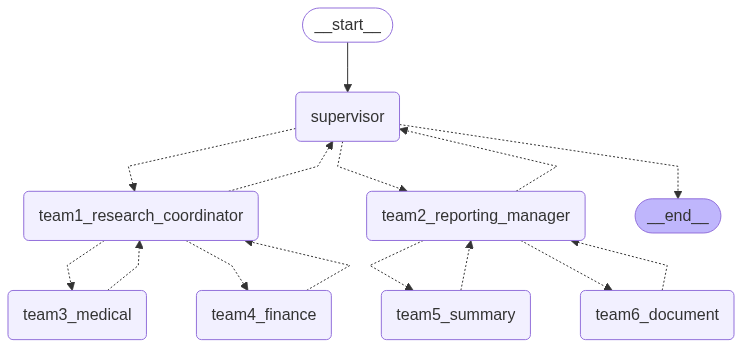

2025-07-04 10:45:53,431 - HierarchicalAgents - INFO - Graph visualization displayed successfully
2025-07-04 10:45:53,438 - HierarchicalAgents - INFO - Mermaid graph code generated successfully
2025-07-04 10:45:53,440 - HierarchicalAgents - INFO - Copy mermaid code and paste at https://mermaid.live to visualize
2025-07-04 10:45:53,441 - HierarchicalAgents - INFO - Workflow creation and visualization completed


In [33]:
# 15: Build the LangGraph Workflow with Visualization 
"""
Create the hierarchical agent workflow and visualize it
"""

def create_hierarchical_workflow():
    """
    Creates the hierarchical agent workflow using LangGraph
    """
    logger.info("Building hierarchical workflow graph")
    
    # Initialize the state graph
    graph = StateGraph(State)
    
    # Add all agent nodes
    agent_nodes = [
        "supervisor", "team1_research_coordinator", "team2_reporting_manager",
        "team3_medical", "team4_finance", "team5_summary", "team6_document"
    ]
    
    for node in agent_nodes:
        if node == "supervisor":
            graph.add_node(node, supervisor_agent)
        elif node == "team1_research_coordinator":
            graph.add_node(node, team1_research_coordinator)
        elif node == "team2_reporting_manager":
            graph.add_node(node, team2_reporting_manager)
        elif node == "team3_medical":
            graph.add_node(node, team3_medical_agent)
        elif node == "team4_finance":
            graph.add_node(node, team4_finance_agent)
        elif node == "team5_summary":
            graph.add_node(node, team5_summary_agent)
        elif node == "team6_document":
            graph.add_node(node, team6_document_agent)
    
    logger.info(f"Added {len(agent_nodes)} agent nodes to workflow")
    
    # Set entry point
    graph.add_edge(START, "supervisor")
    logger.info("Entry point configured: START -> supervisor")
    
    # Compile the workflow
    app = graph.compile()
    logger.info("Hierarchical workflow compiled successfully")
    
    return app

# Create the workflow
workflow_app = create_hierarchical_workflow()

# Visualize the workflow graph
logger.info("Generating workflow visualization")

try:
    from IPython.display import display, Image
    
    # Generate and display the graph visualization
    graph_image = workflow_app.get_graph().draw_mermaid_png()
    display(Image(graph_image))
    logger.info("Graph visualization displayed successfully")
    
except ImportError:
    logger.warning("IPython not available for visualization")
    
except Exception as e:
    logger.warning(f"Graph visualization error: {str(e)}")

# Generate mermaid code for external visualization
try:
    mermaid_code = workflow_app.get_graph().draw_mermaid()
    logger.info("Mermaid graph code generated successfully")
    logger.info("Copy mermaid code and paste at https://mermaid.live to visualize")
except Exception as e:
    logger.warning(f"Could not generate mermaid code: {str(e)}")

logger.info("Workflow creation and visualization completed")

In [34]:
# 16: Execute the Hierarchical Agent System
"""
Run the complete hierarchical system with the assignment task
"""

def run_hierarchical_system(user_objective: str):
    """
    Execute the hierarchical agent system with the given objective
    """
    
    logger.info("Hierarchical agent system execution initiated", extra={
        'objective': user_objective,
        'timestamp': datetime.now().isoformat()
    })
    
    # Initialize the state for the assignment task
    initial_state = {
        "messages": [HumanMessage(content=f"Research and analyze: {user_objective}")],
        "next": "supervisor",
        "user_objective": user_objective,
        "team3_medical_results": "",
        "team4_finance_results": "",
        "team5_summary_results": "",
        "team6_document_results": "",
        "research_phase_complete": False,
        "reporting_phase_complete": False
    }
    
    logger.info("Initial state configured", extra={
        'starting_agent': 'supervisor',
        'phases_complete': 0
    })
    
    # Execute the workflow
    try:
        final_state = workflow_app.invoke(initial_state)
        
        logger.info("Workflow execution completed successfully", extra={
            'final_agent': final_state.get('next', 'unknown'),
            'research_complete': final_state.get('research_phase_complete', False),
            'reporting_complete': final_state.get('reporting_phase_complete', False)
        })
        
        return final_state
        
    except Exception as e:
        logger.error(f"Workflow execution failed: {str(e)}")
        return None

# Assignment Task: AI impact analysis
assignment_task = "Write a report on AI impact in healthcare and finance"

logger.info("Starting assignment execution", extra={'task': assignment_task})

# Execute the system
final_results = run_hierarchical_system(assignment_task)

# Display results if successful
if final_results:
    logger.info("Assignment execution completed successfully")
    
    # Log completion status for each team
    teams_status = {
        'team3_medical': bool(final_results.get('team3_medical_results')),
        'team4_finance': bool(final_results.get('team4_finance_results')),
        'team5_summary': bool(final_results.get('team5_summary_results')),
        'team6_document': bool(final_results.get('team6_document_results'))
    }
    
    logger.info("Team completion status", extra=teams_status)
    logger.info("Hierarchical agent system assignment completed successfully")
    
else:
    logger.error("Assignment execution failed - check error logs above")

2025-07-04 10:45:53,462 - HierarchicalAgents - INFO - Starting assignment execution
2025-07-04 10:45:53,463 - HierarchicalAgents - INFO - Hierarchical agent system execution initiated
2025-07-04 10:45:53,465 - HierarchicalAgents - INFO - Initial state configured
2025-07-04 10:45:53,467 - HierarchicalAgents - INFO - Supervisor agent activated
2025-07-04 10:45:54,378 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-07-04 10:45:54,389 - HierarchicalAgents - INFO - Routing decision made
2025-07-04 10:45:54,390 - HierarchicalAgents - INFO - TEAM1 Research Coordinator activated
2025-07-04 10:45:54,392 - HierarchicalAgents - INFO - Routing to medical research team
2025-07-04 10:45:54,394 - HierarchicalAgents - INFO - TEAM3 Medical Agent activated
2025-07-04 10:45:55,496 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-07-04 10:45:55,508 - HierarchicalAgents - INFO - TEAM3 PubMed research 

In [37]:
# 17: Save Assignment Results to Files 
"""
Save the final assignment results to multiple file formats
"""

import json
import os
from pathlib import Path

def save_results_to_files(final_results, assignment_task):
    """Save results to multiple file formats for assignment submission"""
    
    # Create output directory
    output_dir = Path("outputs")
    output_dir.mkdir(exist_ok=True)
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    logger.info("Saving assignment results to files", extra={'timestamp': timestamp})
    
    # 1. Save complete results as JSON
    json_file = output_dir / f"assignment_results_{timestamp}.json"
    with open(json_file, 'w', encoding='utf-8') as f:
        json.dump({
            'assignment_task': assignment_task,
            'execution_timestamp': timestamp,
            'user_objective': final_results.get('user_objective', ''),
            'team3_medical_results': final_results.get('team3_medical_results', ''),
            'team4_finance_results': final_results.get('team4_finance_results', ''),
            'team5_summary_results': final_results.get('team5_summary_results', ''),
            'team6_document_results': final_results.get('team6_document_results', ''),
            'research_phase_complete': final_results.get('research_phase_complete', False),
            'reporting_phase_complete': final_results.get('reporting_phase_complete', False)
        }, f, indent=2, ensure_ascii=False)
    
    # 2. Save formatted report as text
    txt_file = output_dir / f"final_report_{timestamp}.txt"
    with open(txt_file, 'w', encoding='utf-8') as f:
        f.write(f"HIERARCHICAL AGENT SYSTEM - FINAL REPORT\n")
        f.write(f"{'='*50}\n\n")
        f.write(f"Assignment Task: {assignment_task}\n")
        f.write(f"Execution Time: {timestamp}\n\n")
        
        f.write(f"MEDICAL RESEARCH (TEAM3):\n")
        f.write(f"{'-'*30}\n")
        f.write(f"{final_results.get('team3_medical_results', 'Not completed')}\n\n")
        
        f.write(f"FINANCIAL RESEARCH (TEAM4):\n")
        f.write(f"{'-'*30}\n")
        f.write(f"{final_results.get('team4_finance_results', 'Not completed')}\n\n")
        
        f.write(f"EXECUTIVE SUMMARY (TEAM5):\n")
        f.write(f"{'-'*30}\n")
        f.write(f"{final_results.get('team5_summary_results', 'Not completed')}\n\n")
        
        f.write(f"DOCUMENT CREATION (TEAM6):\n")
        f.write(f"{'-'*30}\n")
        f.write(f"{final_results.get('team6_document_results', 'Not completed')}\n\n")
    
    # 3. Save execution summary for quick review
    summary_file = output_dir / f"execution_summary_{timestamp}.txt"
    with open(summary_file, 'w', encoding='utf-8') as f:
        f.write(f"ASSIGNMENT EXECUTION SUMMARY\n")
        f.write(f"{'='*30}\n")
        f.write(f"Task: {assignment_task}\n")
        f.write(f"Execution Time: {timestamp}\n")
        f.write(f"Research Phase Complete: {final_results.get('research_phase_complete', False)}\n")
        f.write(f"Reporting Phase Complete: {final_results.get('reporting_phase_complete', False)}\n\n")
        f.write(f"TEAMS COMPLETION STATUS:\n")
        f.write(f"  - TEAM3 Medical Research: {'Complete' if final_results.get('team3_medical_results') else 'Incomplete'}\n")
        f.write(f"  - TEAM4 Finance Research: {'Complete' if final_results.get('team4_finance_results') else 'Incomplete'}\n")
        f.write(f"  - TEAM5 Summary Generation: {'Complete' if final_results.get('team5_summary_results') else 'Incomplete'}\n")
        f.write(f"  - TEAM6 Document Creation: {'Complete' if final_results.get('team6_document_results') else 'Incomplete'}\n")
        
        # Add file locations
        f.write(f"\nOUTPUT FILES GENERATED:\n")
        f.write(f"  - JSON Results: {json_file.name}\n")
        f.write(f"  - Formatted Report: {txt_file.name}\n")
        f.write(f"  - Execution Summary: {summary_file.name}\n")
    
    logger.info("Assignment results saved successfully", extra={
        'json_file': str(json_file),
        'txt_file': str(txt_file),
        'summary_file': str(summary_file),
        'output_directory': str(output_dir)
    })
    
    return {
        'json_file': json_file,
        'txt_file': txt_file,
        'summary_file': summary_file,
        'output_directory': output_dir
    }

# Execute the system (if not already done in Block 16)
if 'final_results' not in locals() or final_results is None:
    logger.info("Re-executing system for file output")
    assignment_task = "Write a report on AI impact in healthcare and finance"
    final_results = run_hierarchical_system(assignment_task)

# Save results to files
if final_results:
    try:
        saved_files = save_results_to_files(final_results, assignment_task)
        
        logger.info("Assignment completed and all results saved to files")
        
        # Display file locations to user
        print("ASSIGNMENT RESULTS SAVED SUCCESSFULLY!")
        print("="*50)
        print("Files created in 'outputs' directory:")
        print(f"  1. Complete Results (JSON): {saved_files['json_file'].name}")
        print(f"  2. Formatted Report (TXT): {saved_files['txt_file'].name}")
        print(f"  3. Execution Summary (TXT): {saved_files['summary_file'].name}")
        print(f"\nOutput Directory: {saved_files['output_directory']}")
        print("\nYou can now submit these files for your assignment!")
        
    except Exception as e:
        logger.error(f"Failed to save results to files: {str(e)}")
        print("Error saving files. Check logs for details.")
        
else:
    logger.error("No results to save - system execution failed")
    print("Cannot save results - system execution failed. Check previous blocks.")

logger.info("Block 17 - File output functionality completed")

2025-07-04 10:55:53,530 - HierarchicalAgents - INFO - Saving assignment results to files
2025-07-04 10:55:53,537 - HierarchicalAgents - INFO - Assignment results saved successfully
2025-07-04 10:55:53,538 - HierarchicalAgents - INFO - Assignment completed and all results saved to files
2025-07-04 10:55:53,539 - HierarchicalAgents - INFO - Block 17 - File output functionality completed


ASSIGNMENT RESULTS SAVED SUCCESSFULLY!
Files created in 'outputs' directory:
  1. Complete Results (JSON): assignment_results_20250704_105553.json
  2. Formatted Report (TXT): final_report_20250704_105553.txt
  3. Execution Summary (TXT): execution_summary_20250704_105553.txt

Output Directory: outputs

You can now submit these files for your assignment!
